Computational Exercise
==

In [2]:
using Distributions
using Plots
pyplot()

Plots.PyPlotBackend()

In [73]:
function sim(n=200, β=1, σeu=0.5, R=0.5)
    γ = sqrt(R/(1-R))
    e = rand(MvNormal([0., 0],[1 0.1; 0.1 1]), n)'
    Z = rand(Normal(),n)
    X = Z*β + e[:,2]
    y = X*γ + e[:,1]
        
    βols = (X'X)\(X'y)
    β2sls = 1/(X'Z.*1/(Z'Z)[1,1].*Z'X)[1,1].*X'Z.*1/(Z'Z)[1,1].*Z'y
    
    return vcat(βols, β2sls)
end

sim (generic function with 5 methods)

In [74]:
simulations = SharedArray(Float64, 10000, 2)
for i in 1:10000
    simulations[i,:] = sim()
end;

$\beta_{ols}$:


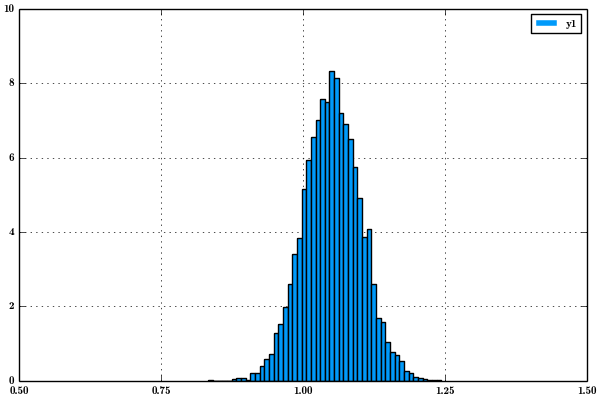

In [78]:
histogram(simulations[:,1], nbins=50, normed=true, ylim=(0,10),xlim=(0.5,1.5))